<a href="https://colab.research.google.com/github/mozzaquatro/financial_market/blob/main/02_Definindo_intervalos%2C_calculando_e_plotando_m%C3%A9dias_m%C3%B3veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

     |████████████████████████████████| 6.3 MB 6.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=b555dc9b863f898cc3fddb6149926f7b85ed07012a12f9757090218f98cae9da
  Stored in directory: /tmp/pip-ephem-wheel-cache-qm9_4tin/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


obtendo os dados do mercado

In [ ]:
ibov = web.get_data_yahoo('USIM5.SA')
ibov.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,2.177777,2.180000,2.122222,2.133333,1.795737,571500
2000-01-04,2.111111,2.111111,2.055555,2.055555,1.730267,1121400
2000-01-05,2.066666,2.255555,2.055555,2.251111,1.894877,1602450
2000-01-06,2.222222,2.455555,2.222222,2.455555,2.066967,3084300
2000-01-07,2.455555,2.577777,2.444444,2.553333,2.149272,2871000


In [ ]:
ibov.tail()

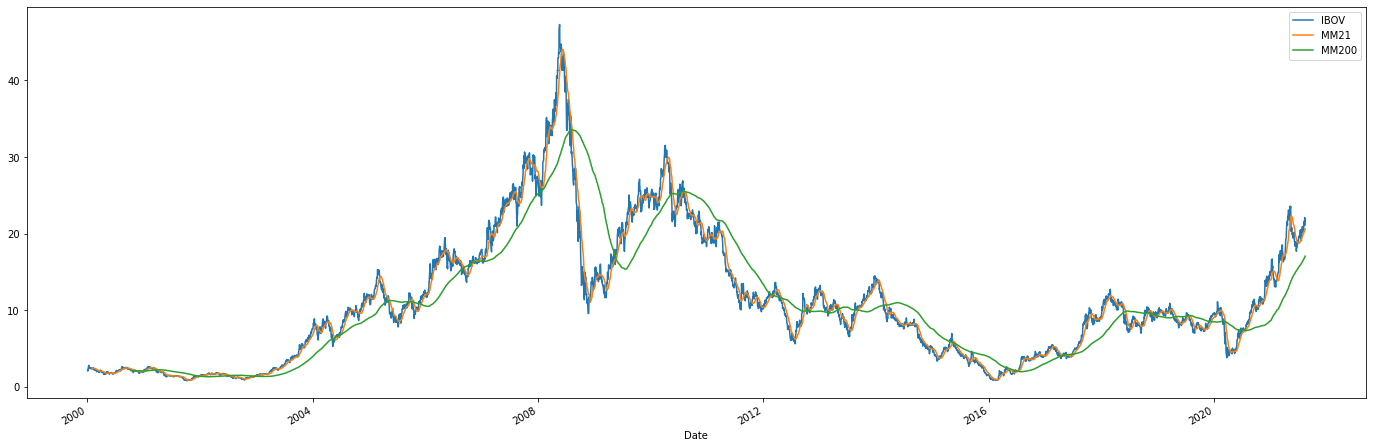

In [ ]:
ibov["Close"].plot(figsize=(24,8),label="IBOV")
ibov["Close"].rolling(21).mean().plot(label="MM21")
ibov["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

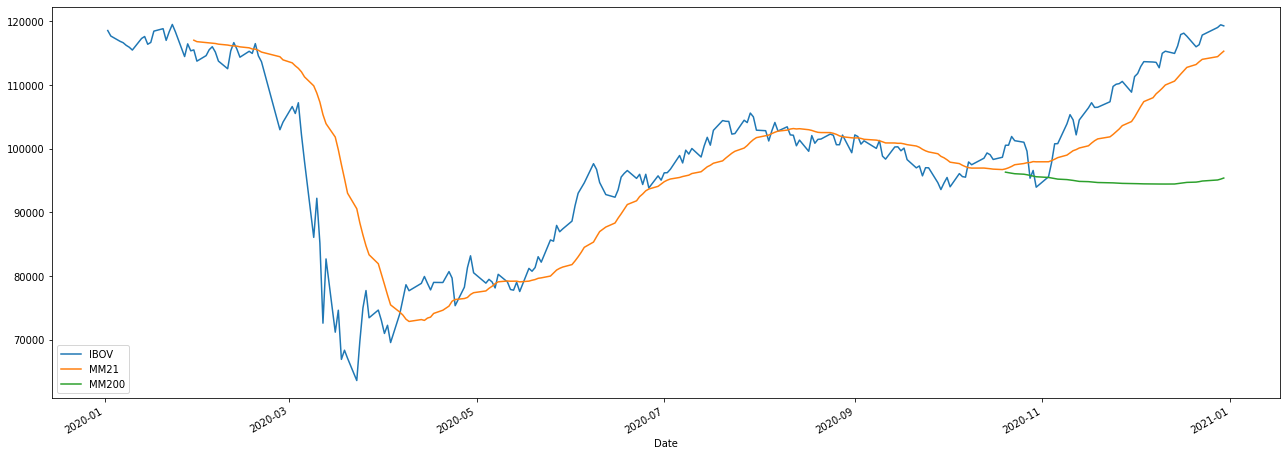

In [ ]:
ibov_fatiado = ibov[ibov.index.year == 2020]
ibov_fatiado["Close"].plot(figsize=(22,8),label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

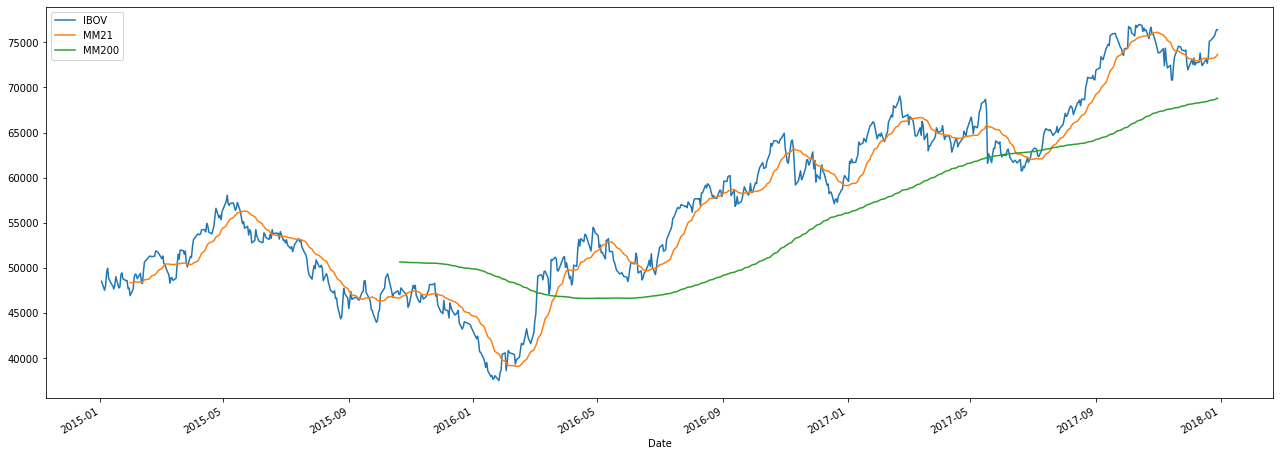

In [ ]:
ibov_fatiado = ibov[(ibov.index.year >= 2015) & (ibov.index.year <= 2017)]
ibov_fatiado["Close"].plot(figsize=(22,8),label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()